# EDA of News Bias/Sentiment Analysis Data

In [38]:
# bring in the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [39]:
# Bring in the data
art_sent1 = pd.read_csv('~/Documents/big_data/articles1_sent.csv')
art_sent2 = pd.read_csv('~/Documents/big_data/articles2_sent.csv')
art_sent3 = pd.read_csv('~/Documents/big_data/articles3_sent.csv')

csv1 = pd.read_csv('~/Documents/big_data/articles1.csv')
csv2 = pd.read_csv('~/Documents/big_data/articles2.csv')
csv3 = pd.read_csv('~/Documents/big_data/articles3.csv')

In [40]:
# Drop the Unnamed: 0 columns
art_sent1.drop('Unnamed: 0', axis=1, inplace=True)
art_sent2.drop('Unnamed: 0', axis=1, inplace=True)
art_sent3.drop('Unnamed: 0', axis=1, inplace=True)

csv1.drop('Unnamed: 0', axis=1, inplace=True)
csv2.drop('Unnamed: 0', axis=1, inplace=True)
csv3.drop('Unnamed: 0', axis=1, inplace=True)

In [41]:
# See how many articles from each publisher are in each DataFrame
print('csv1: \n{}'.format(csv1['publication'].value_counts()))
print('\n')
print('csv2: \n{}'.format(csv2['publication'].value_counts()))
print('\n')
print('csv3: \n{}'.format(csv3['publication'].value_counts()))

csv1: 
Breitbart           23781
CNN                 11488
New York Times       7803
Business Insider     6757
Atlantic              171
Name: publication, dtype: int64


csv2: 
New York Post          17493
Atlantic                7008
National Review         6203
Talking Points Memo     5214
Guardian                4873
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64


csv3: 
NPR                11992
Washington Post    11114
Reuters            10710
Vox                 4947
Guardian            3808
Name: publication, dtype: int64


All articles from any publication are in the same DataFrame. No need to separate them into separate DataFrames by publication. Not yet. We probably will later.

In [42]:
# I want to merge all of the sentiments together
totsent = art_sent1.append(art_sent2).append(art_sent3)
totsent.shape

(142570, 5)

In [43]:
def custom_scaler(vector):
    abs_max = np.max(abs(vector))
    scaled_vector = vector / abs_max
    return scaled_vector

In [44]:
scaled_compound = custom_scaler(totsent['compound'])
totsent['scaled_compound'] = scaled_compound
totsent.describe()

,id,neg,neu,pos,compound,scaled_compound
count,142570.000000,142570.000000,142570.000000,142570.000000,142570.000000,142570.000000
mean,111350.564025,0.062350,0.826135,0.070397,1.049750,0.002930
std,60438.804535,0.038578,0.065777,0.033850,6.533271,0.018236
min,17283.000000,0.000000,0.000000,0.000000,-246.307900,-0.687524
25%,55264.500000,0.034542,0.793963,0.047600,-1.768500,-0.004936
50%,113977.000000,0.056556,0.833278,0.067882,0.799600,0.002232
75%,164554.750000,0.083803,0.867361,0.089878,3.681175,0.010275
max,218082.000000,0.519000,1.000000,0.632000,358.253700,1.000000


Maximum negativity is 0.519; maximum positivity is 0.632; maximum neutrality is 1.00; the scaled_compound vector has a mean that is slightly positive, indicating that the average article has a slightly positive sentiment.

I want to see that perfectly neutral article.

In [45]:
perf_neu = totsent[totsent['neu'] == 1]
perf_neu
# Oh, there's a bunch of them.

,id,neg,neu,pos,compound,scaled_compound
5105,22957,0.0,1.0,0.0,0.0,0.0
8018,26754,0.0,1.0,0.0,0.0,0.0
8902,27638,0.0,1.0,0.0,0.0,0.0
8997,27733,0.0,1.0,0.0,0.0,0.0
9172,27908,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
40621,215559,0.0,1.0,0.0,0.0,0.0
40941,215957,0.0,1.0,0.0,0.0,0.0
41314,216436,0.0,1.0,0.0,0.0,0.0
41332,216461,0.0,1.0,0.0,0.0,0.0


In [46]:
# Join sentiment and article DataFrames

tot1 = pd.merge(csv1, totsent, how='left', on='id')
tot1.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.083857,0.794857,0.085536,0.7504,0.002095
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0.113749,0.842700,0.039067,-44.5612,-0.124384
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",0.064865,0.859405,0.066676,4.5303,0.012646
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",0.083333,0.815387,0.087933,0.0790,0.000221
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.035037,0.854296,0.073667,2.6097,0.007285


In [47]:
tot2 = pd.merge(csv2, totsent, how='left', on='id')
tot2.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
0,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r...",0.108824,0.773059,0.088765,-1.8319,-0.005113
1,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ...",0.034779,0.913597,0.051623,5.4129,0.015109
2,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...,0.084594,0.752375,0.069250,-3.5558,-0.009925
3,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...,0.058313,0.836833,0.083979,3.6127,0.010084
4,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...,0.035208,0.874417,0.048750,1.7098,0.004773


In [48]:
tot3 = pd.merge(csv3, totsent, how='left', on='id')
tot3.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
0,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...,0.174167,0.672778,0.097500,-4.9132,-0.013714
1,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...,0.019643,0.928571,0.051786,0.6169,0.001722
2,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,...",0.079268,0.776732,0.119585,4.4083,0.012305
3,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt...",0.073787,0.798596,0.106340,1.6014,0.004470
4,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...,0.137550,0.772050,0.040400,-5.5531,-0.015500


In [49]:
# ONLY USE THIS CELL IF YOU WANT TO SAVE THE DATAFRAMES!
#tot1.to_csv('~/Documents/big_data/tot1.csv')
#tot2.to_csv('~/Documents/big_data/tot2.csv')
#tot3.to_csv('~/Documents/big_data/tot3.csv')

In [50]:
perf_neu = tot1[tot1['neu'] == 1]
perf_neu = perf_neu.append(tot2[tot2['neu'] == 1])
perf_neu = perf_neu.append(tot3[tot3['neu'] == 1])
perf_neu.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
5105,22957,Voyeur | Christmas Trees - The New York Times,New York Times,George Etheredge,2017-04-11,2017.0,4.0,NaN,Christmas jams at the tunnel Chop through hu...,0.0,1.0,0.0,0.0,0.0
8018,26754,Jane Fonda: I Won’t Call Trump ’By His Name’ -...,Breitbart,Ian Hanchett,2017-01-20,2017.0,1.0,NaN,"On Friday’s broadcast of HBO’s “Real Time,” Ja...",0.0,1.0,0.0,0.0,0.0
8902,27638,Robert De Niro: ‘Mutt’ Trump Has ‘Debased the ...,Breitbart,Pam Key,2017-04-05,2017.0,4.0,NaN,This week in an interview on New York City’s ...,0.0,1.0,0.0,0.0,0.0
8997,27733,Watch: Notre Dame Students Walk Out on VP Mike...,Breitbart,Pam Key,2017-05-21,2017.0,5.0,NaN,Sunday at the University of Notre Dame graduat...,0.0,1.0,0.0,0.0,0.0
9172,27908,Watch: Steve Bannon Sworn in as President Trum...,Breitbart,Breitbart TV,2017-01-22,2017.0,1.0,NaN,Sunday in East Room of the White House at the ...,0.0,1.0,0.0,0.0,0.0


### How many articles from each publication are perfectly neutral?

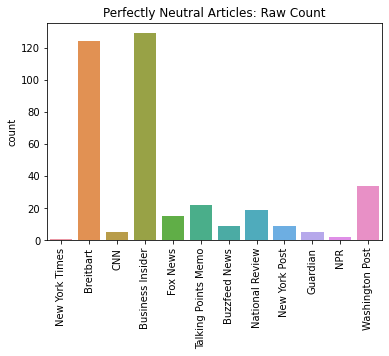

In [51]:
sns.countplot(x='publication', data=perf_neu)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Perfectly Neutral Articles: Raw Count');

I am surprised to see Breitbart keeping up with Business Insider. But we have a LOT more articles from Breitbart than anyone else, so this may be misleading. Let's look at it by percentage.

In [52]:
# find percent of articles by each publication that is perfectly neutral.
neu_counts = perf_neu['publication'].value_counts() 
neu_pubs = neu_counts.index
neu_percent = np.empty(len(neu_pubs))
for i, pub in enumerate(neu_pubs):
    tot_count = csv1.loc[csv1['publication']==pub, 'publication'].count()
    tot_count += csv2.loc[csv2['publication']==pub, 'publication'].count()
    tot_count += csv3.loc[csv3['publication']==pub, 'publication'].count()
    neu_percent[i] = neu_counts[pub] / tot_count

In [53]:
neu_percent = pd.Series(neu_percent, index=neu_pubs)
neu_percent

Business Insider       0.019091
Breitbart              0.005214
Washington Post        0.003059
Talking Points Memo    0.004219
National Review        0.003063
Fox News               0.003445
New York Post          0.000514
Buzzfeed News          0.001854
Guardian               0.000576
CNN                    0.000435
NPR                    0.000167
New York Times         0.000128
dtype: float64

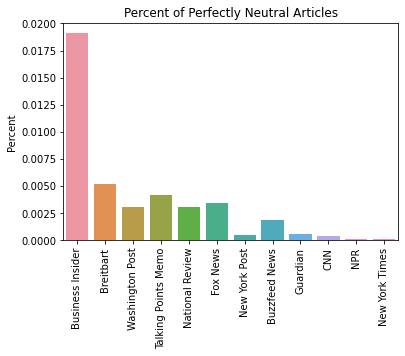

In [54]:
sns.barplot(x=neu_percent.index, y=neu_percent)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Percent')
plt.title('Percent of Perfectly Neutral Articles');

When measured by percentage, Business Insider is by far the most neutral and Breitbart is farther down with the rest of the publications.

### What is the distribution of scaled_compound score?

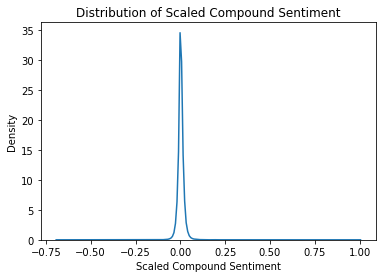

In [55]:
sns.kdeplot(totsent['scaled_compound'])
plt.xlabel('Scaled Compound Sentiment')
plt.ylabel('Density')
plt.title('Distribution of Scaled Compound Sentiment');

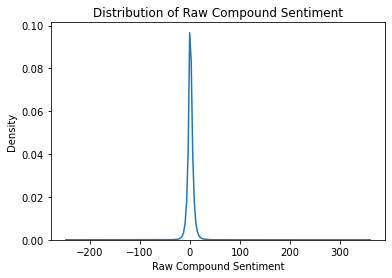

In [56]:
# Eesh. Let's try raw compound score.
sns.kdeplot(totsent['compound'])
plt.xlabel('Raw Compound Sentiment')
plt.ylabel('Density')
plt.title('Distribution of Raw Compound Sentiment');

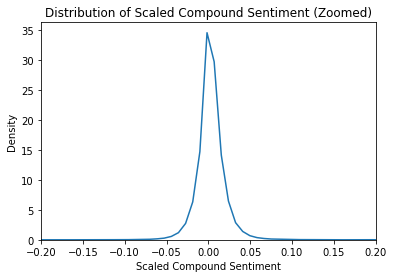

In [57]:
# No change. Let's just zoom in on the scaled_compound kde plot?
sns.kdeplot(totsent['scaled_compound'])
plt.xlabel('Scaled Compound Sentiment')
plt.ylabel('Density')
plt.title('Distribution of Scaled Compound Sentiment (Zoomed)')
plt.xlim(-0.2, 0.2);

In compound score, almost all of the articles are between -0.05 and +0.05. Does this mean most articles are pretty much unsentimental? How does a compound score of 0.05 translate into qualitative sentiment?

Let's look at the maximum and minimum compound sentiment articles.

In [58]:
max_id = totsent.loc[totsent['scaled_compound'] == 1, 'id']
max_compsent_art = csv3[csv3['id'] == max_id.item()]

In [59]:
print(max_compsent_art['title'].item())
print(max_compsent_art['date'].item())
print(max_compsent_art['content'].item())

Full transcript: FBI Director James Comey testifies on Russian interference in 2016 election
2017-03-20
         Below is the full transcript from the House Intelligence Committee hearing on Russian interference in the 2016 U. S. election.    [Justice Dept. has no information that supports Trump’s tweets alleging he was wiretapped by Obama, says Comey]   NUNES: The committee will come to order. I would like to welcome our witnesses, director of the FBI, Jim Comey and director of the National Security Agency, Admiral Rogers. Thank you both for being here today. Before we begin, I would like to remind our members and witnesses that this is an open hearing. I recognize the challenge of discussing sensitive national security issues in public. However, as part of this committee’s investigation into Russian active measures during the 2016 election, it is critical to ensure that the public has access to credible unclassified facts and to clear the air regarding unsubstantiated media reports. 

The article with the most positive sentiment is a word-for-word transcript of a congressional hearing on the FBI investigation into Russian interference in the 2016 election. This may have scored highly in the compound sentiment analysis, but it can hardly be said to be biased. It is word-for-word quoting the people it is reporting on, and offering no input whatsoever. This is quite a blow to the idea of using sentiment analysis for bias-detection.

Let's look at the minimum compound score.

In [60]:
min_id = totsent.loc[totsent['scaled_compound'] == np.min(totsent['scaled_compound']), 'id']
min_compsent_art = csv1[csv1['id'] == min_id.item()]

In [61]:
print(min_compsent_art['title'].item())
print(min_compsent_art['date'].item())
print(min_compsent_art['content'].item())

ISIS: 143 attacks in 29 countries have killed 2,043
2015-12-17
 (CNN) Since declaring its caliphate in June 2014, the   Islamic State has conducted or inspired more than 140 terrorist attacks in 29 countries other than Iraq and Syria, where its carnage has taken a much deadlier toll. Those attacks have killed at least 2, 043 people and injured thousands more. It can be difficult to divine the precise role that international terrorists play in this or that attack. For example, the person who killed four U. S. Marines and a sailor in Chattanooga, Tennessee, in July 2015 was ”motivated by foreign terrorist organization propaganda,” FBI Director James Comey said, though he added that it’s hard to say which terrorist group motivated the killer. It also can be hard to get precise information about some attacks, but it’s clear the deadly tentacles of ISIS have spread quickly from the terrorist group’s epicenter in Iraq and Syria to points around the globe. Here’s a look at terrorist attacks o

The article with the most negative sentiment is about the death toll that ISIS attacks had in nearly 30 countries back in 2015. Negative sentiment makes sense in that context, right? Another blow to the use of sentiment analysis for detecting news bias.

It looks like...what we can do is topic modelling, and then compare sentiments within each topic to find out if some publications have different sentiments on the topic than others. This may not tell us about the bias, but it will give us a way to quantify the effect of potential bias in reporting on each topic.

We will do a bit more exploration here, then perform topic modelling in another notebook.

### Distribution of remaining sentiments

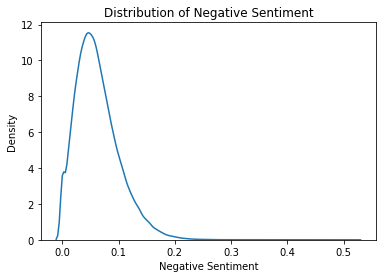

In [62]:
sns.kdeplot(totsent['neg'])
plt.xlabel('Negative Sentiment')
plt.ylabel('Density')
plt.title('Distribution of Negative Sentiment');

Negative sentiment appears to follow something like a $X^2$ distribution, with most of the density near zero. Positive sentiment probably does, too.

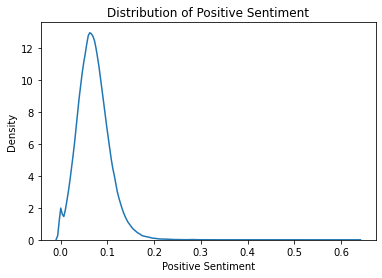

In [63]:
sns.kdeplot(totsent['pos'])
plt.xlabel('Positive Sentiment')
plt.ylabel('Density')
plt.title('Distribution of Positive Sentiment');

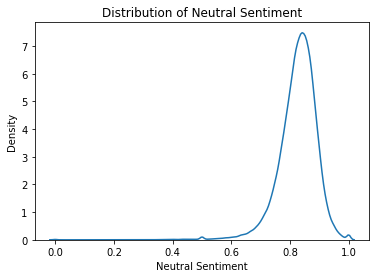

In [64]:
sns.kdeplot(totsent['neu'])
plt.xlabel('Neutral Sentiment')
plt.ylabel('Density')
plt.title('Distribution of Neutral Sentiment');

Neutral sentiment is the interesting one, with most of its density between 0.6 and 1. Of course, it is the complement of (Positive + Negative), so this makes sense.

### Sentiment by publication; Group 1

Group 1 publishers include: 
   * The New York Times
   * Breitbart
   * CNN
   * Business Insider
   * Atlantic

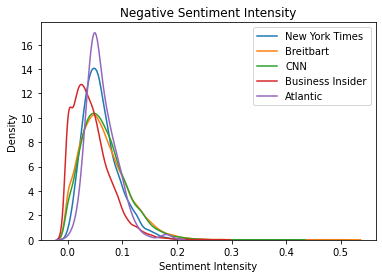

In [65]:
pubs = tot1['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot1.loc[tot1['publication']==pub, 'neg'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Negative Sentiment Intensity');

We can see a slight difference, for sure. Business Insider, who was by far the most neutral, has much more density closer to zero than the others. Atlantic has the highest, sharpest spike. Breitbart has the lowest hump and the widest tails, but is quite close to CNN.

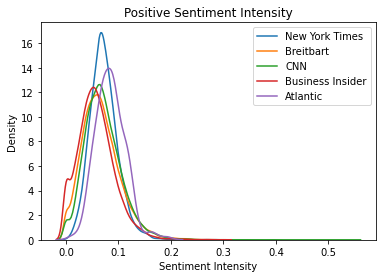

In [66]:
pubs = tot1['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot1.loc[tot1['publication']==pub, 'pos'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Positive Sentiment Intensity');

On positive sentiment, Business Insider is much closer to the others; but it does have a bit of a blip near zero. The New York Times has the highest peak here, but Atlantic has the most probability density farthest to the right. Business Insider, CNN, and Breitbart are very close together.

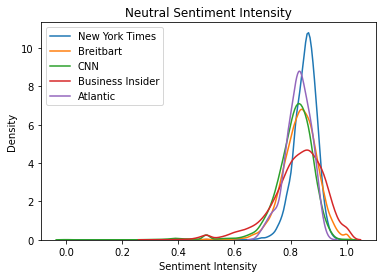

In [67]:
pubs = tot1['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot1.loc[tot1['publication']==pub, 'neu'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Neutral Sentiment Intensity');

This time, we see Business Insider having the lowest peak and widest tails. The New York Times has a high peak near 0.85, and very thin tails, indicating that nearly all of its stories have nearly the same neutral sentiment. Once again, CNN and Breitbart have very similar distributions.

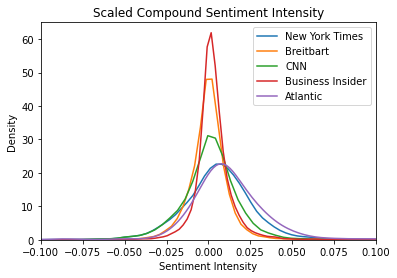

In [68]:
pubs = tot1['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot1.loc[tot1['publication']==pub, 'scaled_compound'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Scaled Compound Sentiment Intensity')
plt.xlim(-0.1,0.1);

In scaled compound sentiment, Business Insider has the highest peak, almost perfectly above zero, and thin tails. Atlantic and the New York Times are centered slightly positive. This is the first time we see a difference between CNN and Breitbart; CNN has a lower peak and fatter tails, more similar to the NYT and Atlantic. 

Let's look at a statistical summary of scaled_compound and see what we can learn from that.

In [69]:
tot1[['publication','scaled_compound']].groupby('publication').describe()

scaled_compound                                          \
                           count      mean       std       min       25%   
publication                                                                
Atlantic                   171.0  0.010865  0.025132 -0.155718  0.001638   
Breitbart                23781.0  0.000231  0.014376 -0.376453 -0.005487   
Business Insider          6757.0  0.003144  0.012328 -0.209532 -0.001757   
CNN                      11488.0  0.000481  0.018902 -0.687524 -0.007757   
New York Times            7803.0  0.005811  0.023052 -0.281829 -0.005863   

                                                
                       50%       75%       max  
publication                                     
Atlantic          0.008843  0.021996  0.117546  
Breitbart         0.000234  0.005696  0.301169  
Business Insider  0.001895  0.006893  0.253544  
CNN               0.001277  0.009837  0.194292  
New York Times    0.006060  0.017854  0.384653

There isn't really more information in the table than in the density plot, but it is more exact information.

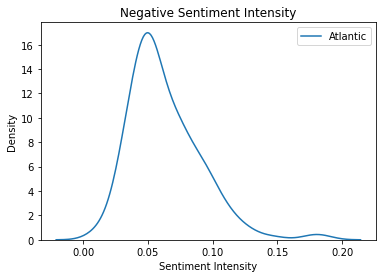

In [70]:
pubs = tot2['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot1.loc[tot1['publication']==pub, 'neg'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Negative Sentiment Intensity');

### Sentiment by publication; Group 2

Group 2 publications include:
* Atlantic
* Fox News
* Talking Points Memo
* Buzzfeed News
* National Review
* New York Post
* Guardian

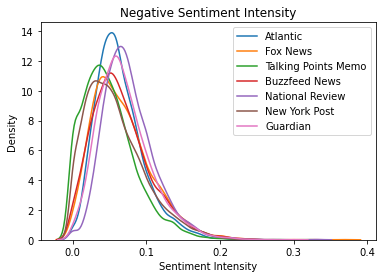

In [71]:
pubs = tot2['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot2.loc[tot2['publication']==pub, 'neg'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Negative Sentiment Intensity');

These are more similar than in Group 1. Atlantic has the highest peak, while Fox News and the New York Post are close to tying for the lowest. Talking Points Memo and the New York Post have more density toward zero, while National Review has the most density away from zero, indicating stronger negative sentiment.

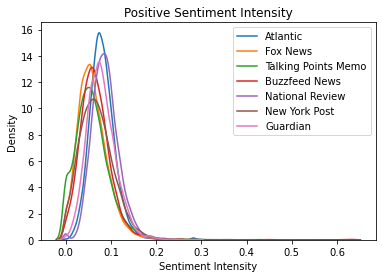

In [72]:
pubs = tot2['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot2.loc[tot2['publication']==pub, 'pos'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Positive Sentiment Intensity');

Again, quite similar. Atlantic has the highest peak, while the New York Post has the lowest. Talking Points Memo has a little blurb toward zero, indicating less positive sentiment. Fox News and Buzzfeed News are nearly identical.

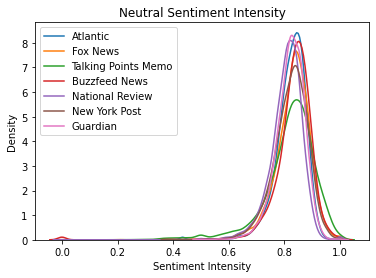

In [73]:
pubs = tot2['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot2.loc[tot2['publication']==pub, 'neu'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Neutral Sentiment Intensity');

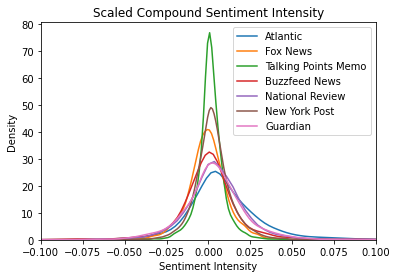

In [74]:
pubs = tot2['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot2.loc[tot2['publication']==pub, 'scaled_compound'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Scaled Compound Sentiment Intensity')
plt.xlim(-0.1,0.1);

The most similar density plot so far! Atlantic, Fox News, Buzzfeed News, and National Review all have nearly the same distribution. However, Talking Points Memo has a much lower peak than the others, and fatter tails.

I don't think we need to look at a table this time.

### Sentiment by publication; Group 3

Group 3 publications include:
* Guardian
* NPR
* Reuters
* Vox
* Washington Post

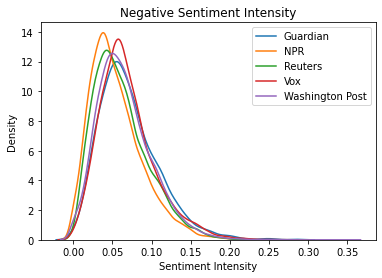

In [75]:
pubs = tot3['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot3.loc[tot3['publication']==pub, 'neg'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Negative Sentiment Intensity');

So far, pretty similar. Vox has a high peak pretty far from zero, indicating more negative sentiment. NPR has the highest peak, quite close to zero. 

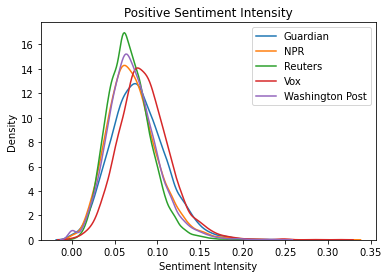

In [76]:
pubs = tot3['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot3.loc[tot3['publication']==pub, 'pos'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Positive Sentiment Intensity');

Reuters now has the highest peak, and the closest peak to zero. Vox is clearly the farthest from zero, indicating the most positive sentiment. It has a fat right tail as well. NPR and Washington Post are quite similar.

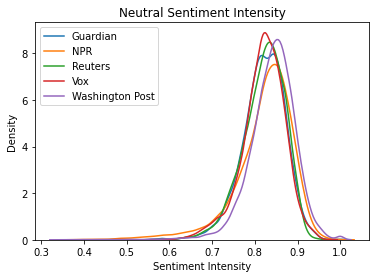

In [77]:
pubs = tot3['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot3.loc[tot3['publication']==pub, 'neu'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Neutral Sentiment Intensity');

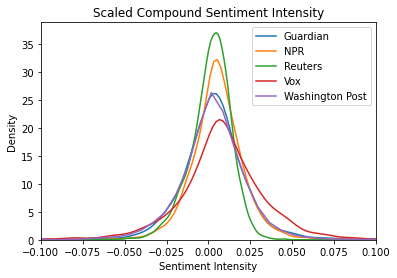

In [78]:
pubs = tot3['publication'].unique()
for pub in pubs:
    sns.kdeplot(tot3.loc[tot3['publication']==pub, 'scaled_compound'])
plt.legend(pubs)
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.title('Scaled Compound Sentiment Intensity')
plt.xlim(-0.1,0.1);

Nothing really special to mention here. All of the publications in Group 3 have a neutrality peak just above 0.8, but Washington Post has the most density near 1 and the thinnest left tail, indicating higher neutrality.

### Creating New Groups

The analysis above only compares distributions between publications that happened to be in the same .csv file. We want to make more comparisons. To do so, we need new groups. 

First, I have created new groups based on subjective measures; each publication is either Traditional News, Fun News, or Blog-style News, as decided by me and me alone. To be Traditional News, the publication should be a well-established journalistic organization that is expected to follow traditional journalism ethics. Fun News refers to publications that sometimes run 'Tabloid'-type stories. Blog-Style News means that the publication is known to include significant analysis and explanation and editorial content in its stories.

The articles fell as follows:

Traditional News:
* New York Times
* CNN
* Fox News
* Guardian
* NPR
* Reuters
* Washington Post

Fun News:
* Buzzfeed News
* Talking Points Memo
* New York Post

Blog-Stlye News:
* Atlantic
* Breitbart
* National Review
* Vox

### Traditional News Sentiment Exploration

In [79]:
trad_pubs = ['New York Times', 'CNN', "Fox News", 'Guardian', 'NPR', 'Reuters', 'Washington Post']
trad_tot = pd.DataFrame(columns = tot1.columns)
for pub in trad_pubs:
    trad_tot = trad_tot.append(tot1[tot1['publication'] == pub])
    trad_tot = trad_tot.append(tot2[tot2['publication'] == pub])
    trad_tot = trad_tot.append(tot3[tot3['publication'] == pub]) 

In [80]:
trad_tot.publication.unique()

array(['New York Times', 'CNN', 'Fox News', 'Guardian', 'NPR', 'Reuters',
       'Washington Post'], dtype=object)

In [81]:
trad_tot.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,0.083857,0.794857,0.085536,0.7504,0.002095
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",0.113749,0.842700,0.039067,-44.5612,-0.124384
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",0.064865,0.859405,0.066676,4.5303,0.012646
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",0.083333,0.815387,0.087933,0.0790,0.000221
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",0.035037,0.854296,0.073667,2.6097,0.007285


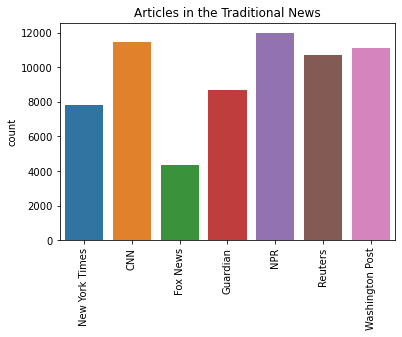

In [82]:
sns.countplot(x='publication', data=trad_tot)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Articles in the Traditional News');

We have the fewest articles from Fox News, then the New York Times and the Guardian. But the other four traditional news sources have close to the same number of articles in the dataset.

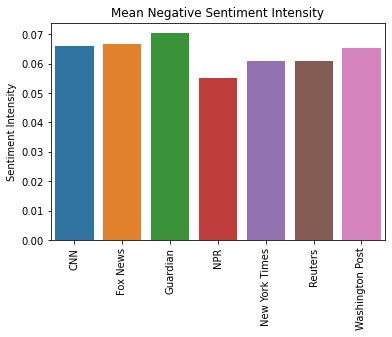

In [83]:
means = trad_tot.groupby('publication').mean()
sns.barplot(x=means.index, y='neg', data=means)
plt.title('Mean Negative Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

All of the traditional sources have similar mean negative sentiment intesities. NPR's is lowest, but not by much. Later, we will test this for significance.

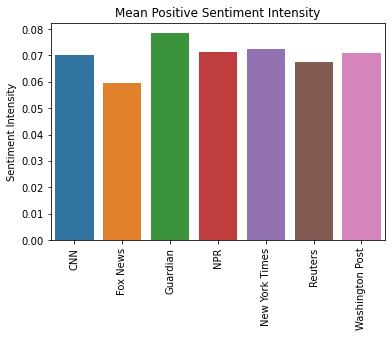

In [84]:
sns.barplot(x=means.index, y='pos', data=means)
plt.title('Mean Positive Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

All of the traditional sources have similar mean positive sentiments. This time, Fox News is the lowest.

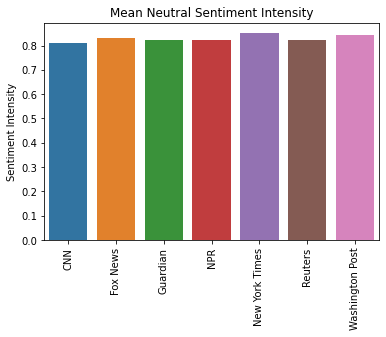

In [85]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

All of the traditional news sources have very close neutrality ratings. New York Times is barely higher than the Washington Post which is barely higher than the third one, and so on. But the scale on this y-axis is very different from the last two. Let's zoom in so that the y-axis is on a similar scale.

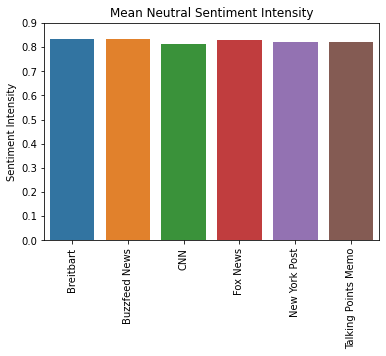

In [132]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity')
plt.ylim(0,0.9);

Now we can see a decent difference between the lot of them. At this scale, where the y-axis covers 0.1 units of intensity, the New York Times has much higher neutral sentiment than most of the others. The Washington Post is still a relatively close second. CNN has the lowest mean neutrality rating.

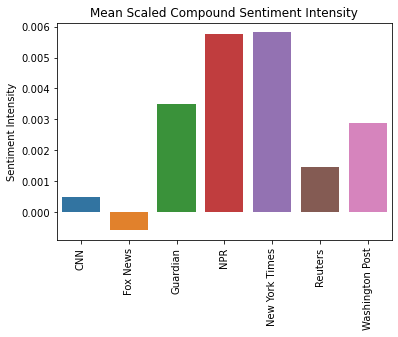

In [87]:
sns.barplot(x=means.index, y='scaled_compound', data=means)
plt.title('Mean Scaled Compound Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Now we can see a bigger difference. However, this may be due to the scale on the y-axis. Let's zoom out to the same scale as the negative-sentiment barplot and see what that looks like.

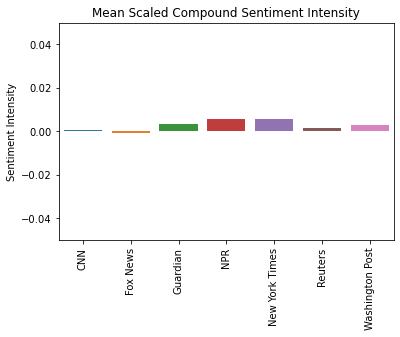

In [88]:
sns.barplot(x=means.index, y='scaled_compound', data=means)
plt.title('Mean Scaled Compound Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity')
plt.ylim(-0.05,0.05);

This still shows the biggest difference of all the barplots. CNN has the mean scaled compound sentiment intensity nearest to zero, while NPR and the New York Times have similar positive compound sentiment. Fox News is the only traditional news source with negative mean compound sentiment.

All of the traditional news sources have a mean scaled compound sentimentality score less than 0.006. But this really just means that they negativity and positivity in their stories balances out. So let's look at distribution plots to see see how they balance.

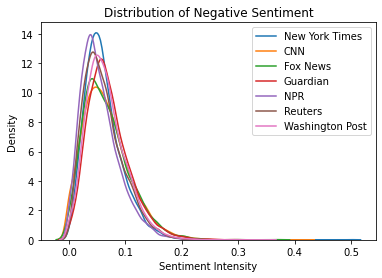

In [89]:
for pub in trad_pubs:
    sns.kdeplot(trad_tot.loc[trad_tot['publication'] == pub, 'neg'])
plt.legend(trad_pubs)
plt.title('Distribution of Negative Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

All of the traditional news sources seem to have peaks aroudn the same place. The New York Times and NPR have peaks of about the same size, with NPR slightly more toward zero. CNN and Fox News have the two lowest peaks, and their distribution is quite similar. Let's plot just those two.

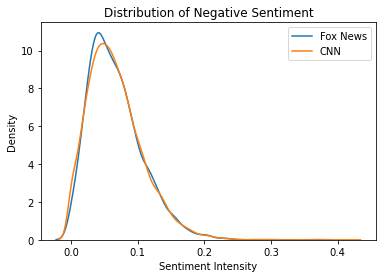

In [90]:
sns.kdeplot(trad_tot.loc[trad_tot['publication'] == 'Fox News', 'neg'])
sns.kdeplot(trad_tot.loc[trad_tot['publication'] == 'CNN', 'neg'])
plt.legend(['Fox News', 'CNN'])
plt.title('Distribution of Negative Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

Yes, CNN and Fox News have the same distribution of negative sentiment.

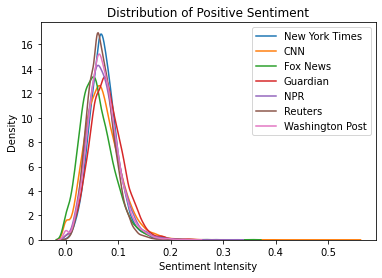

In [91]:
for pub in trad_pubs:
    sns.kdeplot(trad_tot.loc[trad_tot['publication'] == pub, 'pos'])
plt.legend(trad_pubs)
plt.title('Distribution of Positive Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

These are different. Here, we can see that the New York Times and Reuters have a similarly high peak in nearly the same place, and very thin tails. We can also see that CNN has the lowest peak. Fox News and the Guardian have peaks of about the same height, but the Fox News peak is closer to zero. These two also have the density mass closest and farthest from zero, respectively. Let's see just CNN, Fox News, and the Guardian.

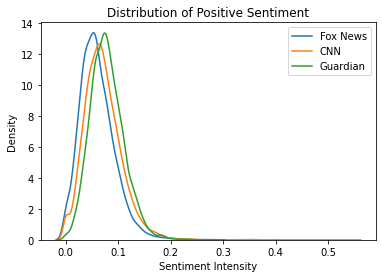

In [92]:
sns.kdeplot(trad_tot.loc[trad_tot['publication'] == 'Fox News', 'pos'])
sns.kdeplot(trad_tot.loc[trad_tot['publication'] == 'CNN', 'pos'])
sns.kdeplot(trad_tot.loc[trad_tot['publication'] == 'Guardian', 'pos'])
plt.legend(['Fox News', 'CNN', 'Guardian'])
plt.title('Distribution of Positive Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

CNN's peak appears to be right between the Guardian and Fox News.

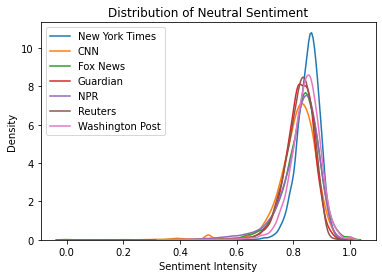

In [93]:
for pub in trad_pubs:
    sns.kdeplot(trad_tot.loc[trad_tot['publication'] == pub, 'neu'])
plt.legend(trad_pubs)
plt.title('Distribution of Neutral Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

The New York Times is quite different from the others. They have by far the highest peak, and that peak is to the right, more neutral, than other peaks. CNN has the lowest mode in terms of neutrality of all the traditional news sources. This time, NPR and Fox News are quite similar. Let's look at just those two.

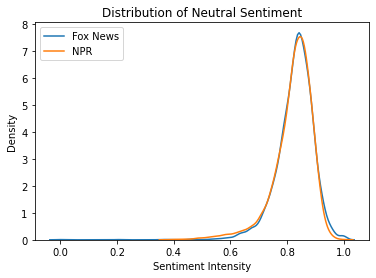

In [94]:
sns.kdeplot(trad_tot.loc[trad_tot['publication'] == 'Fox News', 'neu'])
sns.kdeplot(trad_tot.loc[trad_tot['publication'] == 'NPR', 'neu'])
plt.legend(['Fox News', 'NPR'])
plt.title('Distribution of Neutral Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

Yes, NPR and Fox News have approximately the same distribution of neutrality.

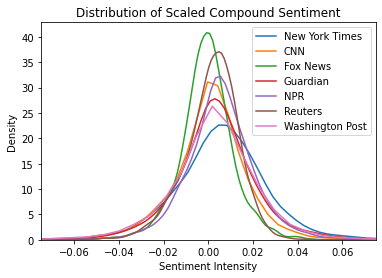

In [95]:
for pub in trad_pubs:
    sns.kdeplot(trad_tot.loc[trad_tot['publication'] == pub, 'scaled_compound'])
plt.legend(trad_pubs)
plt.title('Distribution of Scaled Compound Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.xlim(-0.075,0.075);

In the scaled_compound sentiment intensity vector, Fox News has the highest peak, and it is centered over 0. NPR has the lowest peak, and the fattest right tail. This indicates that more stories from the New York Times have a detected positive sentiment, while Fox News has about the same number of positive and negative stories.

### Fun News Sentiment Exploration

In [96]:
fun_pubs = ['Buzzfeed News', 'Talking Points Memo', 'New York Post']
fun_tot = pd.DataFrame(columns=tot1.columns)
for pub in fun_pubs:
    fun_tot = fun_tot.append(tot1[tot1['publication'] == pub])
    fun_tot = fun_tot.append(tot2[tot2['publication'] == pub])
    fun_tot = fun_tot.append(tot3[tot3['publication'] == pub])
fun_tot.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
16576,99932,Meet The Gay Couple Featured On The Walls Of ...,Buzzfeed News,Sarah Karlan,2017-01-02,2017.0,1.0,https://web.archive.org/web/20170102115815/htt...,’ New York City’s long awaited Second Avenue s...,0.015739,0.938435,0.045826,3.0516,0.008518
16577,99933,"California’s First Dog, Sutter, Has Died",Buzzfeed News,Claudia Koerner,2017-01-03,2017.0,1.0,https://web.archive.org/web/20170103123005/htt...,"’ California’s first dog, a corgi named Sutter...",0.098437,0.799938,0.039125,-1.0438,-0.002914
16578,99934,Chicago Had More Homicides In 2016 Than New Y...,Buzzfeed News,Jim Dalrymple II,2017-01-04,2017.0,1.0,https://web.archive.org/web/20170104131203/htt...,Chicago experienced its bloodiest year in nea...,0.103800,0.838767,0.057433,-6.4552,-0.018019
16579,99935,Ford Abandons Plan For $1.6 Billion Mexico Fa...,Buzzfeed News,Matthew Zeitlin,2017-01-05,2017.0,1.0,https://web.archive.org/web/20170105133057/htt...,Ford has abandoned plans to spend $1. 6 billi...,0.040688,0.852000,0.044812,0.9377,0.002617
16580,99936,Donald Trump’s Twitter Account Is A Security ...,Buzzfeed News,Joseph Bernstein,2017-01-06,2017.0,1.0,https://web.archive.org/web/20170106142813/htt...,My Twitter has been seriously and we are ...,0.094158,0.822500,0.083342,2.9372,0.008199


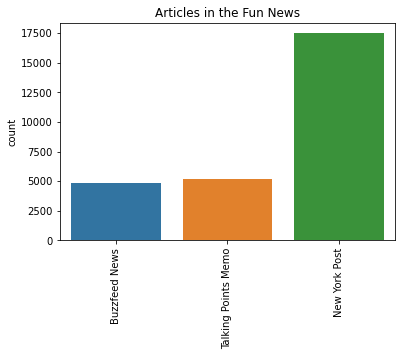

In [97]:
sns.countplot(x='publication', data=fun_tot)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Articles in the Fun News');

There are way more New York Post articles than either of the others, but there are still a lot of articles from each source. We just need to keep the imbalance in mind and not do anything that will be too affected by the number of articles.

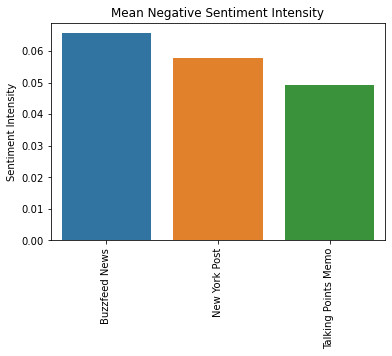

In [98]:
means = fun_tot.groupby('publication').mean()
sns.barplot(x=means.index, y='neg', data=means)
plt.title('Mean Negative Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Buzzfeed has the highest negative sentiment score, and Talking Points memo has the lowest. The New York Post is right in the middle. 

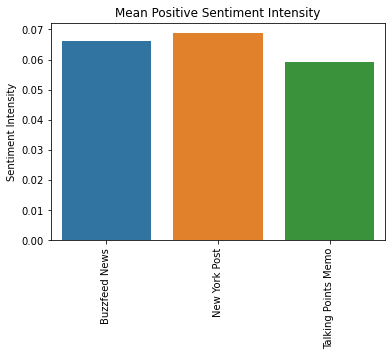

In [99]:
sns.barplot(x=means.index, y='pos', data=means)
plt.title('Mean Positive Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

The New York Post has the highest mean positive sentiment intensity. Talking Points Memo, again, has the lowest mean intensity of the three.

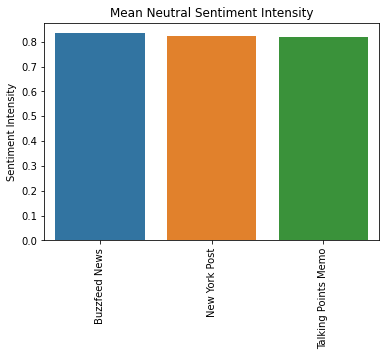

In [100]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

The neutral intensities look the same, but let's change the scale on the y-axis like we did with the Traditional News sources.

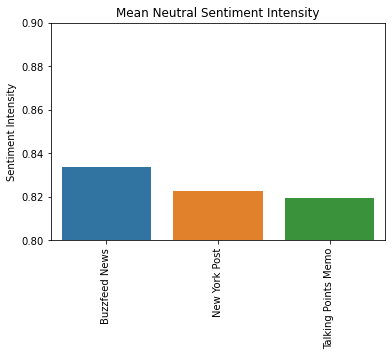

In [101]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity')
plt.ylim(0.8, 0.9);

Now we can see that the mean neutrality scores are similar to the mean negative scores, with Buzzfeed News having the highest neutrality and Talking Points Memo having the lowest.

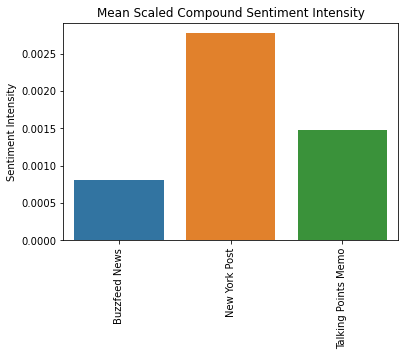

In [102]:
sns.barplot(x=means.index, y='scaled_compound', data=means)
plt.title('Mean Scaled Compound Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Wow that looks like quite a difference! It looks like the New York Post has a much higher mean sentiment than the others, indicating more positivity, but again, the scale on the y-axis is a problem. Let's rescale it!

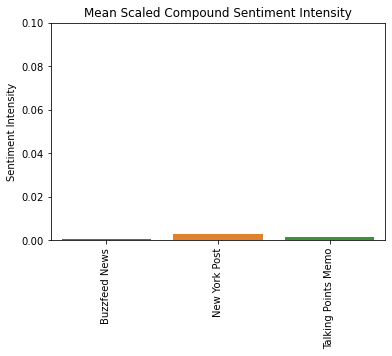

In [103]:
sns.barplot(x=means.index, y='scaled_compound', data=means)
plt.title('Mean Scaled Compound Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity')
plt.ylim(0, 0.1);

Now we see that all three of the Fun News sources have mean scaled compound sentiment near zero. But Buzzfeed News of course is still closest to zero of the three.

Let's Check the distributions.

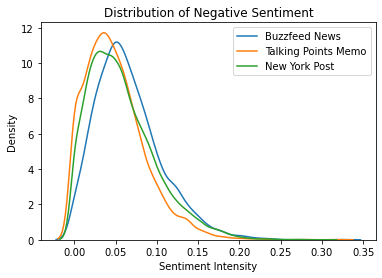

In [104]:
for pub in fun_pubs:
    sns.kdeplot(fun_tot.loc[fun_tot['publication'] == pub, 'neg'])
plt.legend(fun_pubs)
plt.title('Distribution of Negative Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

The distributions of negative sentiment intensity are not so different. Talking Points memo has the highest peak, and its left side is similar to that of the New York Post, while Buzzfeed News has the most density in the right tail, indicating more negativity.

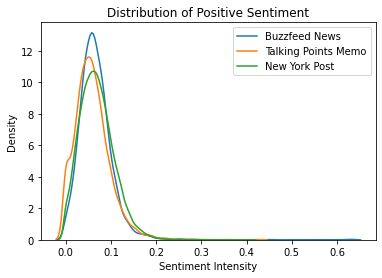

In [105]:
for pub in fun_pubs:
    sns.kdeplot(fun_tot.loc[fun_tot['publication'] == pub, 'pos'])
plt.legend(fun_pubs)
plt.title('Distribution of Positive Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

In positive sentiment, the three distirbutions are pretty much on top of one another. Buzzfeed News has the highest peak and the New York Post has the lowest.

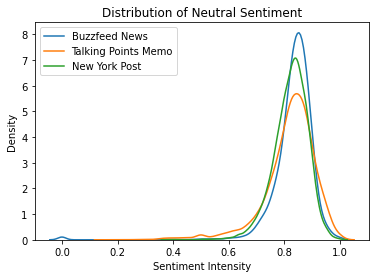

In [106]:
for pub in fun_pubs:
    sns.kdeplot(fun_tot.loc[fun_tot['publication'] == pub, 'neu'])
plt.legend(fun_pubs)
plt.title('Distribution of Neutral Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

The three are on top of one another yet again, just above 0.8 (where the peak densities were for Traditional News sources, too!). Buzzfeed News has the highest peak and narrowest tails, while Talking Points Memo has the lowest peak and fattest tails.

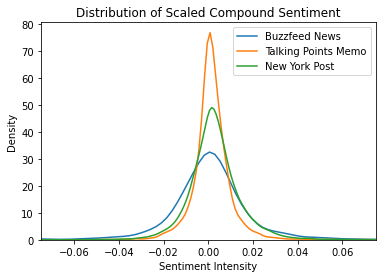

In [107]:
for pub in fun_pubs:
    sns.kdeplot(fun_tot.loc[fun_tot['publication'] == pub, 'scaled_compound'])
plt.legend(fun_pubs)
plt.title('Distribution of Scaled Compound Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.xlim(-0.075, 0.075);

In the scaled compound vector, Talking Points Memo has by far the highest peak, indicating more articles with compound sentiment near zero. Buzzfeed News has the lowest peak and fattest tails.

The Fun News category was interesting because none of the three were very similar in any of the distributions.

### Blog-Style News Sentiment Exploration

In [108]:
blog_pubs = ['Atlantic', 'Breitbart', 'National Review', 'Vox']
blog_tot = pd.DataFrame(columns=tot1.columns)
for pub in blog_pubs:
    blog_tot = blog_tot.append(tot1[tot1['publication'] == pub])
    blog_tot = blog_tot.append(tot2[tot2['publication'] == pub])
    blog_tot = blog_tot.append(tot3[tot3['publication'] == pub]) 
blog_tot.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
49829,73206,"Obama: Reaching Out to Adversaries, Alienating...",Atlantic,Uri Friedman,2016-12-31,2016.0,12.0,NaN,"As a presidential candidate, Barack Obama prom...",0.069292,0.747625,0.162271,14.5869,0.040717
49830,73207,George Michael and Carrie Fisher: The Week in ...,Atlantic,The Editors,2016-12-31,2016.0,12.0,NaN,George Michael Mattered Beyond the MusicWesley...,0.079643,0.791048,0.081667,2.3995,0.006698
49831,73208,The New Reality TV,Atlantic,Megan Garber,2016-12-31,2016.0,12.0,NaN,"“Reality seems tired. It seems derivative,” a ...",0.054208,0.836458,0.088479,8.0968,0.022601
49832,73209,5 Numbers That Explain Education in 2016,Atlantic,Emily DeRuy,2016-12-31,2016.0,12.0,NaN,"As a writer, I generally favor words over numb...",0.032867,0.821867,0.111933,5.8959,0.016457
49833,73210,The Atlantic Politics & Policy Daily: Happy G...,Atlantic,Candice Norwood,2016-12-30,2016.0,12.0,NaN,This article is part of a feature we a...,0.047000,0.828765,0.124235,6.1321,0.017117


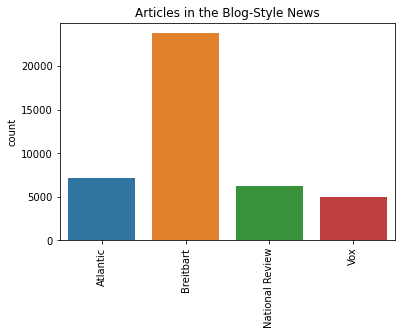

In [109]:
sns.countplot(x='publication', data=blog_tot)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Articles in the Blog-Style News');

We have by far the most articles from Breitbart. Keep that in mind, like we've been doing so far.

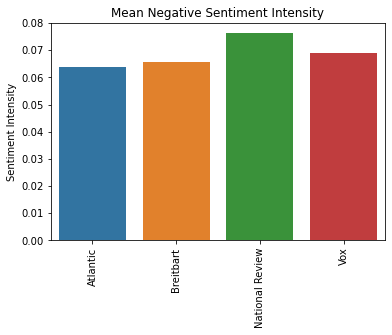

In [110]:
means = blog_tot.groupby('publication').mean()
sns.barplot(x=means.index, y='neg', data=means)
plt.title('Mean Negative Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

National Review has the highest mean negative intesnity, and Atlantic the least. Breitbart and Atlantic are surprisingly close together!

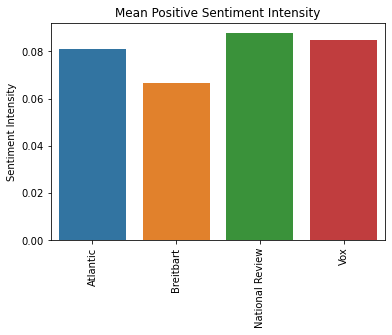

In [111]:
sns.barplot(x=means.index, y='pos', data=means)
plt.title('Mean Positive Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Where Breitbart and Atlantic were close together before, they are very different now. Breitbart has by far the lowest positive sentiment intensity of them all.  The other three are fairly similar, with National Review the highest.

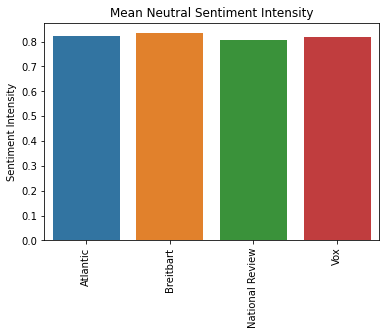

In [112]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Even before rescaling the y-axis, we can see that National review is lower than the others. Let's rescale and see how much lower, relatively.

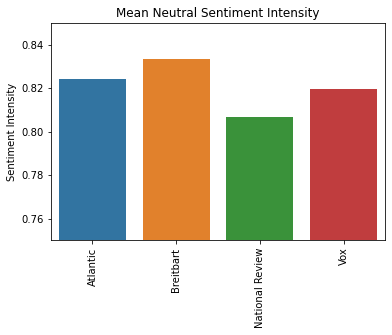

In [113]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity')
plt.ylim(0.75, 0.85);

The mean neutrality of National Review magazine is barely over 0.8, making it the lowest neutrality rating of any of the publications in the dataset! In this plot, Breitbart has the highest neutrality, followed by Atlantic, then Vox, then finally National Review. 

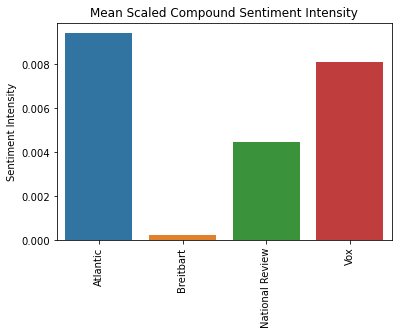

In [114]:
sns.barplot(x=means.index, y='scaled_compound', data=means)
plt.title('Mean Scaled Compound Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Wow it looks like Atlantic has a super high mean scaled compound sentiment. But let's not forget about the scale on the y-axis. However, the benefit to this graph with the misleading y-axis scale is that we can see how much more intense the mean compound sentiment of any other Blog-Style News source is compared to Breitbart.

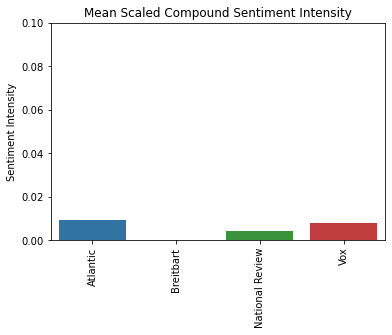

In [115]:
sns.barplot(x=means.index, y='scaled_compound', data=means)
plt.title('Mean Scaled Compound Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity')
plt.ylim(0, 0.1);

When properly scaled, we can't even see Breitbart's scaled compound sentiment at all. It is very close to zero. Atlantic and Vox appear to be nearly the same, and National Review a bit lower.

The most interesting thing about these mean scaled compound sentiment intensity plots so far is that the only news source that has head a negative scaled compound sentiment is Fox News. They are alone in having a mean negative sentiment.

Let's look at the distributions now.

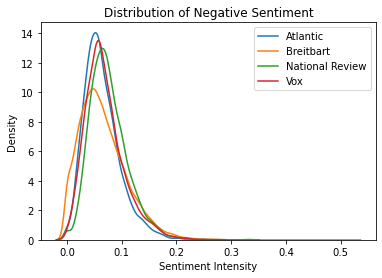

In [116]:
for pub in blog_pubs:
    sns.kdeplot(blog_tot.loc[blog_tot['publication'] == pub, 'neg'])
plt.legend(blog_pubs)
plt.title('Distribution of Negative Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

Atlantic and Vox have very similar distributions, with the highest peak going to Atlantic. Breitbart has the lowest peak and is fattest on the left, indicating less intense negative sentiment in some articles.

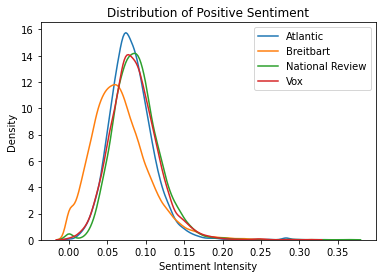

In [117]:
for pub in blog_pubs:
    sns.kdeplot(blog_tot.loc[blog_tot['publication'] == pub, 'pos'])
plt.legend(blog_pubs)
plt.title('Distribution of Positive Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

Breitbart is really different now! While National Review and Vox are quite close together, Breitbart has the lowest peak and a decent chunk of the distribution far to the left of the others, indicating more articles with low positive sentiment. Atlantic again has the highest peak.

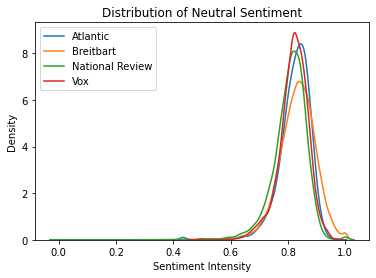

In [118]:
for pub in blog_pubs:
    sns.kdeplot(blog_tot.loc[blog_tot['publication'] == pub, 'neu'])
plt.legend(blog_pubs)
plt.title('Distribution of Neutral Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

The highest peak in the neutral sentiment distribution belong to Vox, but the distributions for Vox, Atlantic, and National Review are quite similar. Breitbart, however, has a much lower pear and a fat right tail.

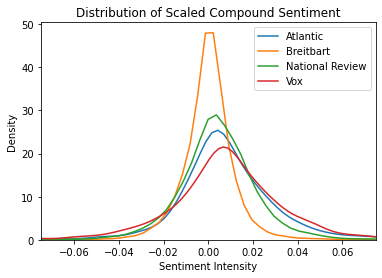

In [119]:
for pub in blog_pubs:
    sns.kdeplot(blog_tot.loc[blog_tot['publication'] == pub, 'scaled_compound'])
plt.legend(blog_pubs)
plt.title('Distribution of Scaled Compound Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.xlim(-0.075, 0.075);

In scaled compound sentiment, Breitbart has the highest peak. The Breitbart distribution has nearly all of its mass between $\pm$0.02, while the lowest peak, Vox, has far tails reaching all the way out to $\pm$0.06. None of the Blog-Style News sources, other than Breitbart, appears to be centered at zero.

### Another grouping

For this group, I want to compare news sources that had especially low scaled compound sentiment intensity:
* Fox News
* Breitbart
* Buzzfeed News
* Talking Points Memo
* New York Post
* CNN

It is interesting that all three of the tabloid-style news sources made the list.

In [120]:
sp_pubs = ['Fox News', 'Breitbart', 'Buzzfeed News', 'Talking Points Memo', 'New York Post', 'CNN']
sp_tot = pd.DataFrame(columns=tot1.columns)

for pub in sp_pubs:
    sp_tot = sp_tot.append(tot1[tot1['publication'] == pub])
    sp_tot = sp_tot.append(tot2[tot2['publication'] == pub])
    sp_tot = sp_tot.append(tot3[tot3['publication'] == pub])
sp_tot.head()

,id,title,publication,author,date,year,month,url,content,neg,neu,pos,compound,scaled_compound
7008,82591,Fire tears through Dubai luxury hotel near pla...,Fox News,NaN,2015-12-31,2015.0,12.0,https://web.archive.org/web/20160101000951/htt...,More than a dozen people were hurt after mass...,0.070182,0.860682,0.023682,-1.8232,-0.005089
7009,82593,Top Carson campaign staffers resign,Fox News,NaN,2015-12-31,2015.0,12.0,https://web.archive.org/web/20160101000951/htt...,Republican presidential candidate Ben Carson’...,0.038059,0.811235,0.091882,2.5276,0.007055
7010,82594,Democrat Martin O’Malley fails to qualify for ...,Fox News,NaN,2015-12-31,2015.0,12.0,https://web.archive.org/web/20160101000951/htt...,Democratic presidential candidate Martin O’Ma...,0.050200,0.814300,0.035500,-0.7253,-0.002025
7011,82595,"Brawl breaks out in GOP race, below the Trump ...",Fox News,NaN,2015-12-30,2015.0,12.0,https://web.archive.org/web/20160101000951/htt...,A nasty battle has broken out in the Republic...,0.077250,0.836056,0.058917,-2.3287,-0.006500
7012,82596,Donald Trump blasts Bill Clinton as ’one of th...,Fox News,Christopher Snyder,2015-12-30,2015.0,12.0,https://web.archive.org/web/20160101000951/htt...,Donald Trump launched new attacks against Bil...,0.040676,0.875108,0.057243,0.7566,0.002112


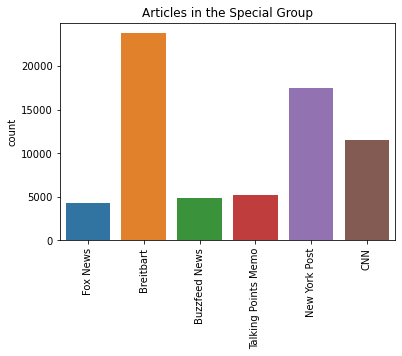

In [121]:
sns.countplot(x='publication', data=sp_tot)
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Articles in the Special Group');

Not much to say. We already know we have a TON of articles from Breitbart.

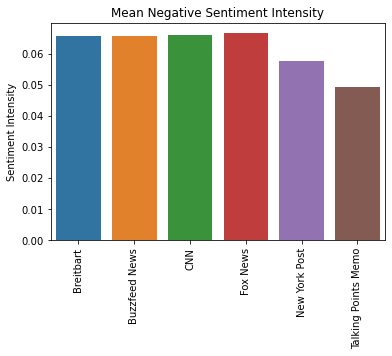

In [122]:
means = sp_tot.groupby('publication').mean()
sns.barplot(x=means.index, y='neg', data=means)
plt.title('Mean Negative Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Breitbart, Buzzfeed News, CNN, and Fox News have indistinguishable mean negative sentiment densities. Really interesting. Talking Points Memo is the lowest.

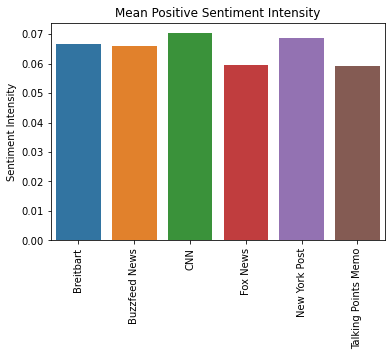

In [123]:
sns.barplot(x=means.index, y='pos', data=means)
plt.title('Mean Positive Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Positivity is much less uniform. CNN and the New York Post have the highest, and Fox News the lowest. Breitbart and Buzzfeed News have similar means.

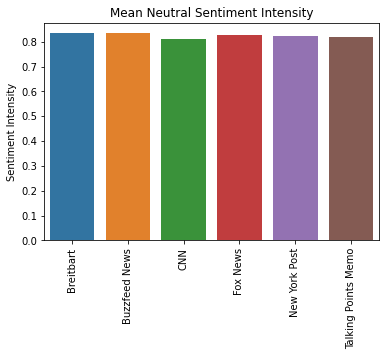

In [124]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

Neutrality looks similar at this scale. Let's zoom in.

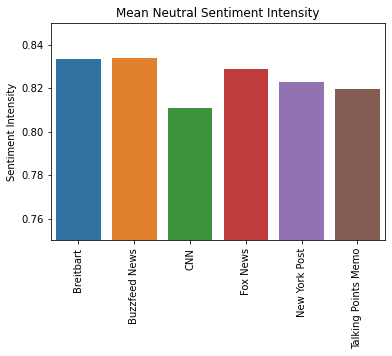

In [125]:
sns.barplot(x=means.index, y='neu', data=means)
plt.title('Mean Neutral Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity')
plt.ylim(0.75, 0.85);

Here, we see Breitbart and Buzzfeed News being very similar and highest, while Fox News is close to them and CNN is far lower. 

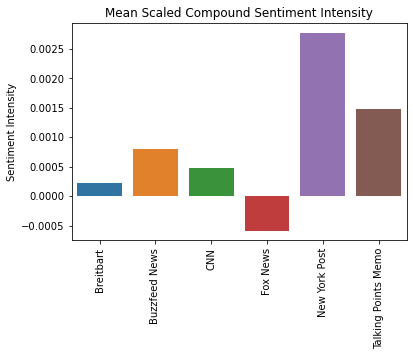

In [126]:
sns.barplot(x=means.index, y='scaled_compound', data=means)
plt.title('Mean Scaled Compound Sentiment Intensity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Intensity');

There are some very obvious difference here, at this scale. We already knew that Fox News was the only source with a negative mean compound sentiment; it is more negative than CNN is positive.

We have also seen that CNN and Fox News have similar distributions, but let's compare them to the others.

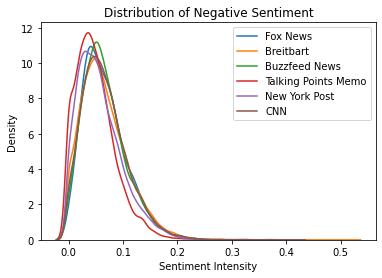

In [127]:
for pub in sp_pubs:
    sns.kdeplot(sp_tot.loc[sp_tot['publication'] == pub, 'neg'])
plt.legend(sp_pubs)
plt.title('Distribution of Negative Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

These are interestingly similar, among all of them. The biggest difference is that Talking Points Memo is the most narrow, on the right side.

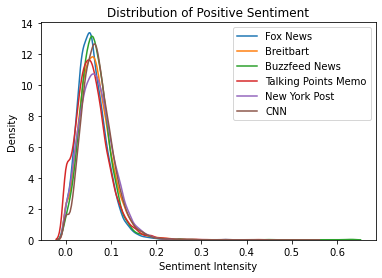

In [128]:
for pub in sp_pubs:
    sns.kdeplot(sp_tot.loc[sp_tot['publication'] == pub, 'pos'])
plt.legend(sp_pubs)
plt.title('Distribution of Positive Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

These are also interestingly similar, even though the New York Post definitely has a lower peak than the others. The tails all seem to be about the same!

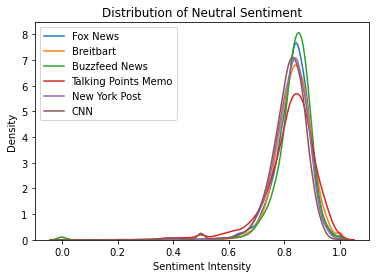

In [129]:
for pub in sp_pubs:
    sns.kdeplot(sp_tot.loc[sp_tot['publication'] == pub, 'neu'])
plt.legend(sp_pubs)
plt.title('Distribution of Neutral Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density');

We are starting to see a bit of difference, even though they are still quite similar. In this one, the New York Post and CNN and Breitbart are nearly identically distributed; Buzzfeed News and Fox News have the two highest peaks; and Talking Points Memo has the lowest peak and fattest left tail.

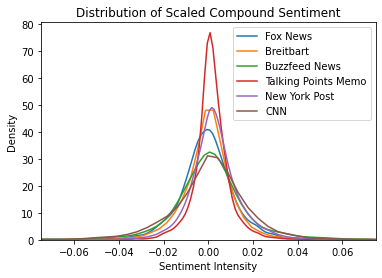

In [130]:
for pub in sp_pubs:
    sns.kdeplot(sp_tot.loc[sp_tot['publication'] == pub, 'scaled_compound'])
plt.legend(sp_pubs)
plt.title('Distribution of Scaled Compound Sentiment')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.xlim(-0.075, 0.075);

Big difference coming out now. Talking Points Memo has by far the highest peak. They are all centered over zero, but the lower peaks have fat tails. This tells us that, outside of Talking Points Memo, the news sources with the lowest mean scaled compound sentiment intensity tend to write articles with positive and negative intensity that cancel each other out.

Let's make a plot of that!

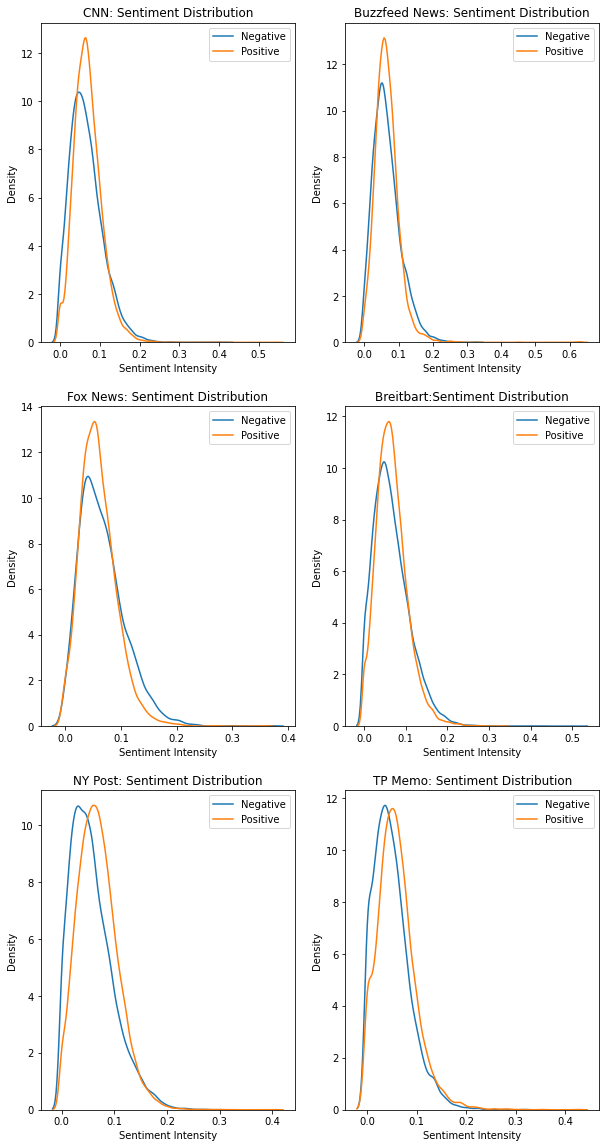

In [131]:
plt.figure(figsize=(10,20))
plt.subplot(3,2,1)
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'CNN', 'neg'])
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'CNN', 'pos'])
plt.title('CNN: Sentiment Distribution')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.legend(['Negative', 'Positive']);

plt.subplot(3,2,2)
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Buzzfeed News', 'neg'])
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Buzzfeed News', 'pos'])
plt.title('Buzzfeed News: Sentiment Distribution')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.legend(['Negative', 'Positive']);


plt.subplot(3,2,3)
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Fox News', 'neg'])
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Fox News', 'pos'])
plt.title('Fox News: Sentiment Distribution')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.legend(['Negative', 'Positive']);

plt.subplot(3,2,4)
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Breitbart', 'neg'])
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Breitbart', 'pos'])
plt.title('Breitbart:Sentiment Distribution')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.legend(['Negative', 'Positive']);

plt.subplot(3,2,5)
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'New York Post', 'neg'])
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'New York Post', 'pos'])
plt.title('NY Post: Sentiment Distribution')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.legend(['Negative', 'Positive']);

plt.subplot(3,2,6)
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Talking Points Memo', 'neg'])
sns.kdeplot(sp_tot.loc[sp_tot['publication'] == 'Talking Points Memo', 'pos'])
plt.title('TP Memo: Sentiment Distribution')
plt.xlabel('Sentiment Intensity')
plt.ylabel('Density')
plt.legend(['Negative', 'Positive']);

In these density plots, the difference between the two distributions is indicative of the mean scaled compound score for the publication. For example, Fox News has a fat right tail on the Negative distribution, and so is the only publication with a negative mean compound score.